<a href="https://colab.research.google.com/github/jesusvillota/CSS_DataScience_2025/blob/main/Session2/2_1_Forecasting_Professions.ipynb"
 target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="max-width: 880px; margin: 20px auto 22px; padding: 0px; border-radius: 18px; border: 1px solid #e5e7eb; background: linear-gradient(180deg, #ffffff 0%, #f9fafb 100%); box-shadow: 0 8px 26px rgba(0,0,0,0.06); overflow: hidden;">

  <!-- Banner Header -->
  <div style="padding: 34px 32px 14px; text-align: center; line-height: 1.38;">
    <div style="font-size: 13px; letter-spacing: 0.14em; text-transform: uppercase; color: #6b7280; font-weight: bold; margin-bottom: 5px;">
      Session #2
    </div>
    <!-- <div style="font-size: 29px; font-weight: 800; color: #14276c; margin-bottom: 4px;">
      Scraping + Image Retrieval + Forecasting
    </div> -->
    <div style="font-size: 29px; font-weight: 800; color: #14276c; margin-bottom: 4px;">
      Who is the Econometrician in the room?
    </div>
    <div style="font-size: 16.5px; color: #374151; font-style: italic; margin-bottom: 0;">
      Data Science for Economics: Mastering Unstructured Data
    </div>
  </div>

  <!-- Logo Section -->
  <div style="background: none; text-align: center; margin: 30px 0 10px;">
    <img src="https://www.cemfi.es/images/Logo-Azul.png" alt="CEMFI Logo" style="width: 158px; filter: drop-shadow(0 2px 12px rgba(56,84,156,0.05)); margin-bottom: 0;">
  </div>

  <!-- Name -->
  <div style="font-family: 'Times New Roman', Times, serif; color: #38549c; text-align: center; font-size: 1.22em; font-weight: bold; margin-bottom: 0px;">
    Jesus Villota Miranda © 2025
  </div>

  <!-- Contact info -->
  <div style="font-family: 'Times New Roman', Times, serif; color: #38549c; text-align: center; font-size: 1em; margin-top: 7px; margin-bottom: 20px;">
    <a href="mailto:jesus.villota@cemfi.edu.es" style="color: #38549c; text-decoration: none; margin-right:8px;" title="Email">
      <!-- Email logo -->
      <!-- <img src="https://cdn-icons-png.flaticon.com/512/11679/11679732.png" alt="Email" style="width:18px; vertical-align:middle; margin-right:5px;"> -->
      jesus.villota@cemfi.edu.es
    </a>
    <span style="color:#9fa7bd;">|</span>
    <a href="https://www.linkedin.com/in/jesusvillotamiranda/" target="_blank" style="color: #38549c; text-decoration: none; margin-left:7px;" title="LinkedIn">
      <!-- LinkedIn logo -->
      <!-- <img src="https://1.bp.blogspot.com/-onvhHUdW1Us/YI52e9j4eKI/AAAAAAAAE4c/6s9wzOpIDYcAo4YmTX1Qg51OlwMFmilFACLcBGAsYHQ/s1600/Logo%2BLinkedin.png" alt="LinkedIn" style="width:17px; vertical-align:middle; margin-right:5px;"> -->
      LinkedIn
    </a>
  </div>
</div>


**IMPORTANT**: **Are you running this notebook in Google Colab?**

- If so, please make sure that in the cell below `running_in_colab` is set to `True`

- And, of course,  make sure to **run the cell**!

In [1]:
# ARE YOU RUNNING THIS IN GOOGLE COLAB? If YES, type True below
running_in_colab = False

In [2]:
import os

if running_in_colab: 
    !pip install requests beautifulsoup4
    from google.colab import drive
    drive.mount('/content/gdrive')
    folder_dir = '/content/gdrive/My Drive/output/2_1'
else: 
    folder_dir = 'output/2_1'

os.makedirs(folder_dir, exist_ok=True)

# Brief Recap from Session 1

This script demonstrates how to perform web scraping to extract faculty data, including images and field information, from the CEMFI faculty webpage. The extracted data is stored locally, and the faculty details are printed out for review.

## What Does the Code Do?

The script is designed to:

1. **Create a Local Directory**: A new folder named `cemfi_faculty_images` is created to store downloaded faculty images.
2. **Send a Web Request**: It sends a GET request to the CEMFI faculty webpage to fetch the HTML content.
3. **Parse HTML Content**: The fetched HTML content is parsed using `BeautifulSoup` to extract specific elements containing faculty details.
4. **Extract Faculty Information**: For each faculty member, the script extracts the image, name, and field of study.
5. **Download and Save Images**: The images of faculty members are downloaded and saved in the local directory.
6. **Display Extracted Data**: Finally, the script prints out the extracted faculty information, including the name, field, and the path to the saved image.

## How Does It Work?

1. **Setup and Libraries**: The script begins by importing necessary libraries: `requests` for HTTP requests, `BeautifulSoup` from `bs4` for HTML parsing, and `os` for file and directory operations.

2. **Creating a Directory**: The `os.makedirs()` function creates a directory named `cemfi_faculty_images`. The `exist_ok=True` parameter ensures that no error is thrown if the directory already exists.

3. **Fetching HTML Content**: The `requests.get()` function sends an HTTP GET request to the specified URL. The response content, which is the HTML of the page, is then parsed by `BeautifulSoup` using the 'html.parser'.

4. **Parsing and Extracting Data**: The parsed HTML is searched for all `div` elements with the class `item-perso`, which contains the faculty details. For each faculty card found:
   - The script checks for an `img` tag to extract the faculty member's image. The `alt` attribute of the `img` tag provides the faculty member's name.
   - The image URL is constructed by combining the base URL of the site with the relative path found in the `src` attribute of the `img` tag.
   - The script sends another GET request to fetch the image, which is then saved to the local directory using Python's file handling capabilities.
   - It then looks for a paragraph tag (`<p>`) with the class `g-book` to extract the faculty's field of study. If the tag is not found, a default message "No field information available" is used.

5. **Saving Images and Information**: The downloaded images are saved in the `cemfi_faculty_images` directory with filenames derived from the faculty member's name. The extracted details (name, field, and image path) are stored in a list named `faculty_details`.

6. **Outputting the Results**: Finally, the script iterates over the `faculty_details` list and prints out each faculty member's name, field, and the local path of their saved image.

---

The process of scraping and saving data can be viewed as a series of transformations:

- **HTTP Request Transformation**: $ R: \text{URL} \rightarrow \text{HTML Content} $
- **HTML Parsing**: $ P: \text{HTML Content} \rightarrow \text{Structured Data} $
- **Data Extraction**: $ E: \text{Structured Data} \rightarrow (\text{Name}, \text{Image URL}, \text{Field}) $

These transformations together represent the full pipeline from raw webpage data to structured, locally stored data.



In [3]:
import requests
from bs4 import BeautifulSoup

os.makedirs(os.path.join(folder_dir, 'cemfi_faculty_images'), exist_ok=True)

# URL of the website
url = "https://www.cemfi.es/people/faculty/index.asp"

# Send a GET request to the website
response = requests.get(url)

# Parse the page content using BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')

# Prepare a list to store faculty details
faculty_details = []

# Find all elements with the class 'item-perso', which contains the faculty member information
faculty_cards = soup.find_all('div', class_='item-perso')

# Iterate over each faculty card
for card in faculty_cards:
    # Extract the image tag
    img_tag = card.find('img')
    if img_tag:
        # Extract the name from the 'alt' attribute
        name = img_tag['alt'].strip()

        # Extract the image URL
        img_url = 'https://www.cemfi.es' + img_tag['src'].replace('..', '')

        # Save the image
        img_response = requests.get(img_url)
        img_name = os.path.join(folder_dir, 'cemfi_faculty_images', f"{name.replace(' ', '_')}.jpg")
        with open(img_name, 'wb') as f:
            f.write(img_response.content)

        # Extract the field information
        field_tag = card.find('p', class_='g-book')
        if field_tag:
            field = field_tag.get_text(strip=True).replace('Fields:', '').strip()
        else:
            field = "No field information available"

        # Append the details to the list
        faculty_details.append({'name': name, 'field': field, 'image': img_name})

# Display the collected faculty details
for faculty in faculty_details:
    print(f"Name: {faculty['name']}, Field: {faculty['field']}, Image: {faculty['image']}")

Name: Dante Amengual, Field: Time-series Econometrics, Financial Econometrics, Image: output/2_1/cemfi_faculty_images/Dante_Amengual.jpg
Name: Manuel Arellano, Field: Econometrics, Labor Economics, Image: output/2_1/cemfi_faculty_images/Manuel_Arellano.jpg
Name: Dmitry Arkhangelsky, Field: Microeconometrics, Applied Econometrics, Image: output/2_1/cemfi_faculty_images/Dmitry_Arkhangelsky.jpg
Name: Samuel Bentolila, Field: Labor Economics, Economics of Education, Image: output/2_1/cemfi_faculty_images/Samuel_Bentolila.jpg
Name: Giulia Buccione, Field: Development Economics, Political Economy, Image: output/2_1/cemfi_faculty_images/Giulia_Buccione.jpg
Name: Guillermo Caruana, Field: Microeconomic Theory, Industrial Organization, Image: output/2_1/cemfi_faculty_images/Guillermo_Caruana.jpg
Name: Susanna Esteban, Field: Industrial Organization, Applied Microeconomics, Image: output/2_1/cemfi_faculty_images/Susanna_Esteban.jpg
Name: Natalia Fabra, Field: Industrial Organization, Energy Econ

# Building a Convolutional Neural Network (CNN) for Image Classification

In this section, we will discuss the process of preparing data and building a Convolutional Neural Network (CNN) model to classify images of faculty members based on their field of expertise, specifically identifying those involved in "Econometrics". This approach utilizes Python libraries like NumPy, PIL (Python Imaging Library), and TensorFlow's Keras API for deep learning.


#  **Data Loading and Preparation**:
Loads images from a specified directory, processes them into a consistent format, and generates labels for binary classification (whether the faculty member's field includes "Econometrics").

## Function Objective

The `load_data` function aims to:

1. **Load Images**: It reads images from a directory specified by `image_dir` and converts them into a numerical format suitable for machine learning.
2. **Preprocess Images**: It ensures that all images are in RGB format and resizes them to a uniform size of 128x128 pixels.
3. **Generate Labels**: It creates a binary label for each image based on whether the field "Econometrics" is mentioned in the faculty member's field description.

## Detailed Breakdown of the Function

### 1. **Loading Images**

The function starts by initializing two empty lists, `images` and `labels`, to store the image data and their corresponding labels. It iterates over each entry in `faculty_details`, which contains information about each faculty member, including their image file path and field of study.

- **Image Path Construction**: For each faculty member, the path to their image file is constructed using `os.path.join`, which combines the base directory (`image_dir`) with the image filename. This ensures that the script correctly locates the image files regardless of the operating system being used.

### 2. **Image Preprocessing**

The next step involves reading the image and converting it to a format suitable for numerical analysis:

- **Image Reading and Conversion**: The image is opened using `Image.open(img_path)` from the PIL library and immediately converted to RGB format using `.convert('RGB')`. This ensures all images are standardized to the same color format, which is essential for consistent image processing.
- **Image Resizing**: The images are resized to 128x128 pixels using `.resize((128, 128))`. Standardizing the size of all images is crucial in machine learning to ensure that input data dimensions match the expected input shape of the model. Mathematically, resizing transforms each image from its original dimension $ (w, h, c) $ to a fixed dimension of $ (128, 128, 3) $, where $ w $ and $ h $ are the width and height of the image, and $ c = 3 $ represents the three color channels (Red, Green, Blue).

- **Conversion to Array**: The resized image is converted into a NumPy array using `np.array(img)`. This transformation is necessary because most machine learning libraries require input data in the form of numerical arrays. Each image is thus transformed into a three-dimensional array of shape $128 \times 128 \times 3$ where each entry in the array represents the pixel intensity for a particular color channel.

### 3. **Label Generation**

The function then generates binary labels for each image:

- **Binary Classification Label**: A label is generated for each faculty image based on whether the string "Econometrics" is present in the faculty's field information. If "Econometrics" is present, the label is set to 1; otherwise, it is set to 0. This binary labeling can be expressed mathematically as:

$$
\text{label} =
\begin{cases}
1 & \text{if "Econometrics" appears in faculty['field']} \\
0 & \text{otherwise}
\end{cases}
$$

### 4. **Conversion to NumPy Arrays**

After all images and labels are processed:

- **Conversion to NumPy Arrays**: Both the `images` and `labels` lists are converted to NumPy arrays using `np.array(images)` and `np.array(labels)`. This conversion is crucial because NumPy arrays are optimized for performance and are the standard input format for most machine learning frameworks.

### 5. **Return Statement**

Finally, the function returns the processed image data and corresponding labels:

$$
\text{return } (X, y)
$$

where $X$ is the array (matrix) of images of shape $(n, 128, 128, 3)$ and $y$ is the array of binary labels of shape $(n,1)$, with $n$ being the number of faculty members.

In [4]:
import os
import numpy as np
from PIL import Image

# Load and prepare the data
def load_data(image_dir, faculty_details):
    images = []
    labels = []

    for faculty in faculty_details:
        img_path = os.path.join(faculty['image'])
        img = Image.open(img_path).convert('RGB')  # Ensure all images are in RGB format
        img = img.resize((128, 128))  # Resize images to 128x128 pixels
        img_array = np.array(img)
        images.append(img_array)

        # Binary label: 1 if "Econometrics" appears in fields, else 0
        label = 1 if "Econometrics" in faculty['field'] else 0
        labels.append(label)

    images = np.array(images)
    labels = np.array(labels)

    return images, labels

# Image Classification Using Convolutional Neural Networks (CNN)

The objective is to train a Convolutional Neural Network (CNN) to predict the probability that an image corresponds to a faculty member whose field includes "Econometrics."

## Overview of the Code Workflow

1. **Load and Normalize Image Data**: The code first loads the image data and labels using the `load_data` function and normalizes the pixel values of the images.
2. **Data Splitting**: It splits the data into training and testing sets to evaluate model performance.
3. **Model Definition**: A CNN model is defined, consisting of convolutional layers, pooling layers, a flattening layer, and fully connected dense layers, tailored for binary classification.
4. **Model Compilation**: The model is compiled with an optimizer, loss function, and evaluation metrics.
5. **Model Training**: The CNN is trained on the training data with a specified number of epochs and batch size.
6. **Model Evaluation**: The trained model is evaluated on the test data to assess its accuracy.
7. **Predictions**: The model predicts probabilities for the presence of "Econometrics" for each faculty image and prints the results.

## Detailed Explanation

### 1. **Loading and Normalizing Data**

- The code starts by loading the images and corresponding labels using the `load_data` function. The pixel values of the images are then normalized to a range between 0 and 1 by dividing by 255.0.

$$
\text{normalized\_pixel} = \frac{\text{original\_pixel}}{255.0}
$$

- This normalization is crucial because pixel values range from 0 to 255, and rescaling them helps in faster convergence during training, as smaller input values lead to smaller gradients, reducing the risk of exploding gradients in the neural network.


### 2. **Data Splitting**

- The data is then split into training and testing sets using the `train_test_split` function, with 80% of the data used for training and 20% for testing.
- This split ensures that the model is trained on a portion of the data while being evaluated on unseen data, which helps assess its generalization ability.

### 3. **Model Definition**

A Convolutional Neural Network (CNN) is defined using Keras' Sequential API. The model architecture consists of:

- **Convolutional Layers (Conv2D)**: These layers apply a series of filters to the input image, allowing the model to learn spatial hierarchies of features. Each convolutional layer uses a filter size of (3, 3) and ReLU activation to introduce non-linearity.
  
- **Max Pooling Layers (MaxPooling2D)**: Pooling layers reduce the dimensionality of the feature maps, helping to reduce computational complexity and prevent overfitting. The pooling size is (2, 2), which down-samples the input by taking the maximum value over a 2x2 window.

- **Flatten Layer**: This layer converts the 2D matrices (feature maps) into a 1D vector to feed into fully connected layers.

- **Fully Connected Layers (Dense)**: These layers learn the non-linear combinations of the high-level features extracted by the convolutional layers. The first dense layer has 128 units with ReLU activation, while the output layer has 1 unit with sigmoid activation, suitable for binary classification.

- **Dropout Layer**: A dropout rate of 0.5 is used to randomly drop 50% of the neurons during training, which helps prevent overfitting by ensuring the model does not rely too heavily on any one feature.

### 4. **Model Compilation**

The model is compiled with the Adam optimizer, a variant of stochastic gradient descent that adapts the learning rate for each parameter. The loss function used is `binary_crossentropy`, suitable for binary classification tasks. The model is also set to track the `accuracy` metric during training.

The binary cross-entropy loss function can be expressed as:

$$
\mathcal{L} = -\frac{1}{N} \sum_{i=1}^{N} \left[ y_i \log(p_i) + (1 - y_i) \log(1 - p_i) \right]
$$

where $y_i$ is the true label (0 or 1), $p_i$ is the predicted probability, and $N$ is the number of samples.

### 5. **Model Training**

The model is trained using the `fit` method, which iterates over the training data for a specified number of epochs (10 in this case) with a batch size of 32. The `validation_data` parameter is set to use the testing data for evaluating the model's performance after each epoch. This process helps monitor the model's ability to generalize to new data and avoid overfitting.

### 6. **Model Evaluation**

After training, the model's performance is evaluated on the test set using the `evaluate` method. This method returns the loss and accuracy of the model on the test data, giving an indication of how well the model has learned to classify the images. The test accuracy is printed as a percentage.

### 7. **Making Predictions**

The model's `predict` method is then used to compute the predicted probabilities for the presence of "Econometrics" for each image in the dataset. These probabilities are continuous values between 0 and 1, indicating the model's confidence that the corresponding image belongs to the "Econometrics" class.

In [5]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [6]:
# 'faculty_details' is the list of dictionaries we previously created
image_dir = folder_dir + 'cemfi_faculty_images'
images, labels = load_data(image_dir, faculty_details)

# Preprocess the data
images = images.astype('float32') / 255.0  # Normalize pixel values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Ensure labels are in the correct shape (1D array)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Single output for binary classification
])

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Predict probabilities for the presence of "Econometrics"
predictions = model.predict(images)

# Print the names and predicted probabilities
for i, faculty in enumerate(faculty_details):
    print(f"Name: {faculty['name']}, Predicted Probability of 'Econometrics': {predictions[i][0]:.2f}")

/Users/jesusvillotamiranda/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 633ms/step - accuracy: 0.4107 - loss: 0.6768 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.7937 - loss: 4.5474 - val_accuracy: 1.0000 - val_loss: 7.5336e-04
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.8042 - loss: 1.3552 - val_accuracy: 1.0000 - val_loss: 0.4155
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.8042 - loss: 0.5605 - val_accuracy: 1.0000 - val_loss: 0.5892
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.7937 - loss: 0.5977 - val_accuracy: 1.0000 - val_loss: 0.3473
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.8042 - loss: 0.5545 - val_accuracy: 1.0000 - val_loss: 0.1281
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.7937 - loss: 0.5052 - val_accuracy: 1.0000 - val_loss: 0.1391
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7937 - loss: 0.5193 - val_accuracy: 1.0000 - val_loss

## Convolutional Neural Network (CNN) Structure in Detail

A Convolutional Neural Network (CNN) is a specialized kind of neural network designed specifically for processing structured grid data, such as images. The CNN architecture is particularly well-suited for tasks like image classification because it can capture spatial hierarchies of features in an efficient manner.

### Overview of the CNN Architecture

The CNN defined in the code has the following layers:

1. **Convolutional Layers**: Three layers with increasing numbers of filters (32, 64, 128).
2. **Pooling Layers**: Three MaxPooling layers, each following a convolutional layer.
3. **Flatten Layer**: Converts the 2D feature maps into a 1D vector
4. **Fully Connected (Dense) Layers**: Two layers, including one hidden layer and one output layer.
5. **Dropout Layer**: A regularization layer to prevent overfitting.

### 1. **Convolutional Layers (Conv2D)**

**Purpose**: Convolutional layers are the core building blocks of a CNN. They apply a set of learnable filters (also known as kernels) to the input image to extract features. Each filter is capable of detecting a specific pattern, such as edges, textures, or more complex features in deeper layers.

**Operation**:
Given an input image $I$ of size $H \times W \times C$ (Height, Width, Channels) and a filter $K$ of size $f \times f \times C$ (where $f$ is the filter size and $C$ is the number of input channels), the convolution operation outputs a feature map $O$.

The convolution operation can be expressed mathematically as:

$$
O_{ij}^k = (I * K^k)_{ij} = \sum_{m=0}^{f-1} \sum_{n=0}^{f-1} \sum_{c=0}^{C-1} I_{i+m, j+n, c} \cdot K_{m, n, c}^k + b^k
$$

where:
- $O_{ij}^k$ is the output feature map at position $(i, j)$ for the $k$-th filter.
- $I_{i+m, j+n, c}$ is the input pixel value at position $(i+m, j+n)$ in channel $c$.
- $K_{m, n, c}^k$ is the filter weight at position $(m, n)$ for the $k$-th filter.
- $b^k$ is the bias term for the $k$-th filter.

**Layers in the Code**:
- **First Conv2D Layer**: 32 filters, each of size $3 \times 3$. The output is a set of 32 feature maps of reduced dimensions.
- **Second Conv2D Layer**: 64 filters, each of size $3 \times 3$. It further processes the feature maps from the previous layer.
- **Third Conv2D Layer**: 128 filters, each of size $3 \times 3$. This layer captures even more complex patterns in the images.

#### 2. **MaxPooling Layers (MaxPooling2D)**

**Purpose**: Pooling layers reduce the spatial dimensions (Height and Width) of the feature maps, thereby reducing the number of parameters and computation in the network. MaxPooling, in particular, helps to retain the most significant features detected by the convolutional layers by taking the maximum value over a defined spatial window.

**Operation**:
For a feature map $O$ of size $H \times W \times F$ (where $F$ is the number of filters), MaxPooling with a window size $p \times p$ and stride $s$ outputs a reduced feature map $O'$.

The MaxPooling operation is defined as:

$$
O'_{i, j, f} = \max \left( O_{m, n, f} \right)
$$

for $m \in [i \cdot s, i \cdot s + p)$ and $n \in [j \cdot s, j \cdot s + p)$, where $i, j$ are the indices of the output feature map, and $f$ is the filter index.

**Layers in the Code**:
- **First MaxPooling2D Layer**: Reduces each feature map's spatial dimensions by taking the maximum value in each \(2 \times 2\) window, effectively down-sampling the input by a factor of 2.
- **Second MaxPooling2D Layer**: Performs the same operation after the second convolutional layer.
- **Third MaxPooling2D Layer**: Further reduces the size of the feature maps after the third convolutional layer.

### 3. **Flatten Layer**

**Purpose**: The Flatten layer converts the 3D feature maps outputted by the last pooling layer into a 1D vector (similar to a vec operator generalized to tensors). This transformation is necessary to connect the convolutional layers to the fully connected layers.

**Operation**:
If the input to the Flatten layer is a 3D tensor of shape $H \times W \times F$, it is reshaped into a 1D vector of size $(H W F,1)$.

### 4. **Fully Connected (Dense) Layers**

**Purpose**: Dense layers (or fully connected layers) are used to learn non-linear combinations of the high-level features extracted by the convolutional layers and pooling layers. They are typically placed at the end of the network to perform classification or regression tasks.

**Operation**:
Given an input vector $x \in \mathbb{R}^n$ and a weight matrix $W \in \mathbb{R}^{m \times n}$ (where $n$ is the number of input neurons and $m$ is the number of output neurons), the dense layer outputs:

$$
y = \sigma(Wx + b)
$$

where:
- $y \in \mathbb{R}^m$ is the output vector.
- $b \in \mathbb{R}^m$ is the bias vector.
- $\sigma$ is the activation function (e.g., ReLU for the hidden layer, sigmoid for the output layer).

**Layers in the Code**:
- **First Dense Layer**: Has 128 neurons with ReLU activation. This layer learns the non-linear combinations of the features extracted by the previous layers.
- **Output Dense Layer**: Has 1 neuron with sigmoid activation, producing a value between 0 and 1, representing the probability of the image belonging to the "Econometrics" class. This layer is used for binary classification tasks.

### 5. **Dropout Layer**

**Purpose**: The Dropout layer is a regularization technique used to prevent overfitting. During training, it randomly sets a fraction of input units to 0 at each update step, which helps the model become more robust by not relying too heavily on any individual neurons.

**Operation**:
During training, for a given input $x \in \mathbb{R}^n$, a dropout mask $m \in \mathbb{R}^n$ is applied, where each element $m_i \sim \text{Bernoulli}(p)$ (with probability $p$ of being 1). The output of the dropout layer is:

$$
\tilde{x} = m \odot x
$$

where $\odot$ denotes Hadamard (element-wise) multiplication.

In this code, the dropout rate is set to 0.5, meaning that 50% of the input neurons are randomly set to 0 during training, which helps in reducing overfitting.

<!-- ### Conclusion

The architecture of the CNN in this code is designed to progressively extract increasingly complex features from the input images through a series of convolutional and pooling layers. These features are then fed into fully connected layers that learn to classify the images based on these features. The combination of convolutional layers for feature extraction and fully connected layers for classification is what makes CNNs powerful tools for image recognition tasks. -->


In [7]:
import pandas as pd

for i, faculty in enumerate(faculty_details):
    true_label = labels[i]
    predicted_probability = predictions[i][0]
    # store the label and probability of each faculty
    faculty['true_label'] = true_label
    faculty['predicted_probability'] = predicted_probability

# Create a dataframe with the name, true label and predicted prob of econometrics
data = [{'name': faculty['name'], 'true_label': faculty['true_label'], 'predicted_probability': faculty['predicted_probability']} for faculty in faculty_details]
df = pd.DataFrame(data)

# Order the dataframe by descending order in predicted_probability
df = df.sort_values(by='predicted_probability', ascending=False)

# print the dataframe
df


,name,true_label,predicted_probability
2,Dmitry Arkhangelsky,1,0.164707
18,Enrique Sentana,1,0.156189
20,Liyang Sun,1,0.153482
34,Henrique Basso,0,0.152753
17,Rafael Repullo,0,0.152110
11,Gerard Llobet,0,0.149998
3,Samuel Bentolila,0,0.145562
8,Sebastián Fanelli,0,0.144389
9,Nezih Guner,0,0.142884
16,Diego Puga,0,0.141549


# ROC Curve & Separation Plot

## 1. **Understanding the ROC Curve**

The **Receiver Operating Characteristic (ROC) curve** is a graphical representation used to evaluate the performance of a binary classification model. In our context, where the task is to predict whether a faculty member's field includes "Econometrics" based on image data, the ROC curve helps us understand how well our model distinguishes between the two classes ("Econometrics" and "Not Econometrics").

### Components of the ROC Curve:

- **True Positive Rate (TPR)**: Also known as sensitivity or recall, it measures the proportion of actual positives (faculty members whose field includes "Econometrics") correctly identified by the model. Mathematically, it is defined as:

$$
\text{TPR} = \frac{\text{True Positives (TP)}}{\text{True Positives (TP)} + \text{False Negatives (FN)}}
$$

- **False Positive Rate (FPR)**: It measures the proportion of actual negatives (faculty members whose field does not include "Econometrics") incorrectly classified as positive by the model. It is defined as:

$$
\text{FPR} = \frac{\text{False Positives (FP)}}{\text{False Positives (FP)} + \text{True Negatives (TN)}}
$$

### Interpreting the ROC Curve:

- The ROC curve plots **TPR** (y-axis) against **FPR** (x-axis) at various threshold settings. Each point on the ROC curve represents a different threshold for classifying a prediction as positive.
  
- The **diagonal line** (gray dashed line) from (0,0) to (1,1) represents the performance of a random classifier. A model that lies along this line has no discriminative ability (random guessing).

- The **area under the ROC curve (AUC)** quantifies the overall ability of the model to discriminate between the two classes. In our plot:
  - An **AUC of 1** indicates a perfect classifier.
  - An **AUC of 0.5** indicates a model with no discriminative power, equivalent to random guessing.
  - An **AUC between 0.5 and 1** indicates a model that performs better than random.

In our case, the ROC curve will help us visually assess the trade-off between the true positive rate and the false positive rate. A model with a ROC curve that bows towards the top left corner (higher TPR with lower FPR) is considered better. The **AUC value** next to the ROC curve provides a single scalar value summarizing the model's performance.

## 2. **Understanding the Separation Plot**

The **Separation Plot** provides a visual representation of how well the model's predicted probabilities separate the two classes. This plot is particularly useful in illustrating how confident the model is in its predictions and how these predictions align with the actual outcomes.

### Components of the Separation Plot:

- **Sorted Instances**: On the x-axis, the instances (faculty members) are sorted by their predicted probability of belonging to the "Econometrics" class. This ordering helps visualize the distribution of predictions.
  
- **True Labels**: The bars represent the true labels of each instance (0 for "Not Econometrics", 1 for "Econometrics"). The color of the bars (e.g., gray) indicates the actual class of each instance.

- **Predicted Probabilities**: The blue line represents the predicted probabilities from the model for each instance. A higher probability indicates greater confidence that the instance belongs to the "Econometrics" class.

### Interpreting the Separation Plot:

- If the model is well-calibrated and performs well, instances with true labels of "Econometrics" (1s) should cluster at the higher end of the predicted probabilities (towards the right side of the plot), while instances with "Not Econometrics" (0s) should cluster at the lower end (towards the left side of the plot).

- The **gap** between the sorted predicted probabilities and the actual labels provides insight into the model's ability to separate the two classes. Ideally, there should be a clear separation between the two classes, with minimal overlap.

- **Annotations**: In this plot, each bar is annotated with the corresponding faculty member's name, providing additional context and allowing us to see which specific faculty members the model confidently classifies.

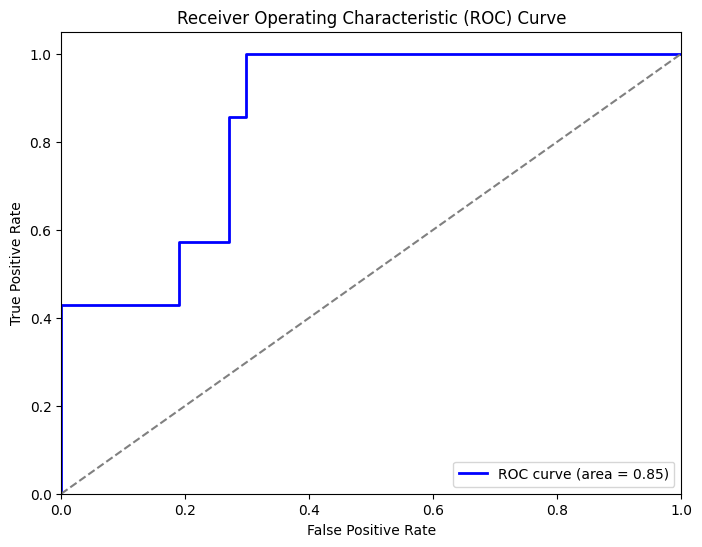

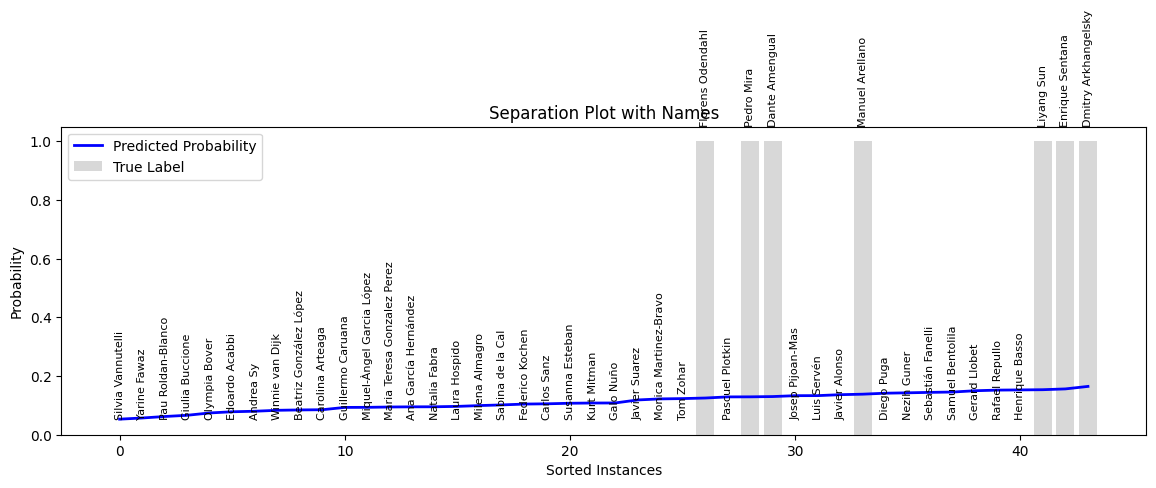

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(labels, predictions)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Create a separation plot with names
sorted_indices = np.argsort(predictions[:, 0])
sorted_labels = labels[sorted_indices]
sorted_predictions = predictions[sorted_indices]
sorted_names = [faculty_details[i]['name'] for i in sorted_indices]

plt.figure(figsize=(14, 4))
plt.bar(range(len(sorted_labels)), sorted_labels, color='gray', alpha=0.3, label='True Label')
plt.plot(sorted_predictions, color='blue', lw=2, label='Predicted Probability')
plt.xlabel('Sorted Instances')
plt.ylabel('Probability')
plt.title('Separation Plot with Names')
plt.legend(loc='upper left')

# Annotate each bar with the faculty member's name
for i, name in enumerate(sorted_names):
    plt.text(i, sorted_labels[i] + 0.05, name, rotation=90, fontsize=8, ha='center', va='bottom')

plt.show()